In [1]:
def get_data(path):
    with open(path, 'r') as file:
        data = [json.loads(line) for line in file]
    return data

def get_accuracy(arr):
    count = 0
    correct = 0
    for ans in arr:
        if ans['answer'] == ans['gold_ans_char']:
            correct += 1
        count += 1
    return (correct / count) * 100

def get_completion_accuracy(arr):
    count = 0
    correct = 0
    for ans in arr:
        if ans['is_correct'] == True:
            correct += 1
        count += 1
    return (correct / count) * 100

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from collections import defaultdict
import os
import math

# First ones

## Char and Digits CoT

In [3]:
llama_8b_first_char_cot = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl")
llama_70b_first_char_cot  = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl")
olmo_7b_first_char_cot = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl") 

llama_8b_first_digit_cot = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl")
llama_70b_first_digit_cot = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl")
olmo_7b_first_digit_cot = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl") 

In [4]:
llama_8b_acc_first_char_cot = get_accuracy(llama_8b_first_char_cot)
llama_70b_acc_first_char_cot = get_accuracy(llama_70b_first_char_cot)
olmo_7b_acc_first_char_cot = get_accuracy(olmo_7b_first_char_cot)

llama_8b_acc_first_digit_cot = get_accuracy(llama_8b_first_digit_cot)
llama_70b_acc_first_digit_cot = get_accuracy(llama_70b_first_digit_cot)
olmo_7b_acc_first_digit_cot = get_accuracy(olmo_7b_first_digit_cot)

## Char and Digits No CoT

In [5]:
llama_8b_first_char_nocot = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl")
llama_70b_first_char_nocot  = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl")
olmo_7b_first_char_nocot = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl") 

llama_8b_first_digit_nocot = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl")
llama_70b_first_digit_nocot = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl")
olmo_7b_first_digit_nocot = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl") 

In [6]:
llama_8b_acc_first_char_nocot = get_accuracy(llama_8b_first_char_nocot)
llama_70b_acc_first_char_nocot = get_accuracy(llama_70b_first_char_nocot)
olmo_7b_acc_first_char_nocot = get_accuracy(olmo_7b_first_char_nocot)

llama_8b_acc_first_digit_nocot = get_accuracy(llama_8b_first_digit_nocot)
llama_70b_acc_first_digit_nocot = get_accuracy(llama_70b_first_digit_nocot)
olmo_7b_acc_first_digit_nocot = get_accuracy(olmo_7b_first_digit_nocot)

# Last ones

## Char and Digits CoT

In [7]:
llama_8b_last_char_cot = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl")
llama_70b_last_char_cot  = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl")
olmo_7b_last_char_cot = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl") 

llama_8b_last_digit_cot = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl")
llama_70b_last_digit_cot = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl")
olmo_7b_last_digit_cot = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl") 

In [8]:
llama_8b_acc_last_char_cot = get_accuracy(llama_8b_last_char_cot)
llama_70b_acc_last_char_cot = get_accuracy(llama_70b_last_char_cot)
olmo_7b_acc_last_char_cot = get_accuracy(olmo_7b_last_char_cot)

llama_8b_acc_last_digit_cot = get_accuracy(llama_8b_last_digit_cot)
llama_70b_acc_last_digit_cot = get_accuracy(llama_70b_last_digit_cot)
olmo_7b_acc_last_digit_cot = get_accuracy(olmo_7b_last_digit_cot)

## Char and Digits No CoT

In [9]:
llama_8b_last_char_nocot = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl")
llama_70b_last_char_nocot  = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl")
olmo_7b_last_char_nocot = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl") 

llama_8b_last_digit_nocot = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl")
llama_70b_last_digit_nocot = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl")
olmo_7b_last_digit_nocot = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl") 

In [10]:
llama_8b_acc_last_char_nocot = get_accuracy(llama_8b_last_char_nocot)
llama_70b_acc_last_char_nocot = get_accuracy(llama_70b_last_char_nocot)
olmo_7b_acc_last_char_nocot = get_accuracy(olmo_7b_last_char_nocot)

llama_8b_acc_last_digit_nocot = get_accuracy(llama_8b_last_digit_nocot)
llama_70b_acc_last_digit_nocot = get_accuracy(llama_70b_last_digit_nocot)
olmo_7b_acc_last_digit_nocot = get_accuracy(olmo_7b_last_digit_nocot)

# Flip-Flop

In [11]:
llama_8b_flipflop_fw_lc_cot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
llama_8b_flipflop_fw_lc_nocot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-lc_seed-5.jsonl")
llama_8b_flipflop_fw_rc_cot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-rc_seed-5.jsonl")
llama_8b_flipflop_fw_rc_nocot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-rc_seed-5.jsonl")
llama_8b_flipflop_lw_lc_cot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
llama_8b_flipflop_lw_lc_nocot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-lc_seed-5.jsonl")
llama_8b_flipflop_lw_rc_cot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_cot_lw-rc_seed-5.jsonl")
llama_8b_flipflop_lw_rc_nocot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-rc_seed-5.jsonl")

llama_70b_flipflop_fw_lc_cot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
llama_70b_flipflop_fw_lc_nocot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-lc_seed-5.jsonl")
llama_70b_flipflop_fw_rc_cot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-rc_seed-5.jsonl")
llama_70b_flipflop_fw_rc_nocot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-rc_seed-5.jsonl")
llama_70b_flipflop_lw_lc_cot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
llama_70b_flipflop_lw_lc_nocot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-lc_seed-5.jsonl")
llama_70b_flipflop_lw_rc_cot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_cot_lw-rc_seed-5.jsonl")
llama_70b_flipflop_lw_rc_nocot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-rc_seed-5.jsonl")

olmo_7b_flipflop_fw_lc_cot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
olmo_7b_flipflop_fw_lc_nocot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-lc_seed-5.jsonl")
olmo_7b_flipflop_fw_rc_cot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-rc_seed-5.jsonl")
olmo_7b_flipflop_fw_rc_nocot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-rc_seed-5.jsonl")
olmo_7b_flipflop_lw_lc_cot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
olmo_7b_flipflop_lw_lc_nocot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-lc_seed-5.jsonl")
olmo_7b_flipflop_lw_rc_cot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_cot_lw-rc_seed-5.jsonl")
olmo_7b_flipflop_lw_rc_nocot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-rc_seed-5.jsonl")

In [12]:
llama_acc_8b_flipflop_fw_lc_cot = get_accuracy(llama_8b_flipflop_fw_lc_cot)
llama_acc_8b_flipflop_fw_lc_nocot = get_accuracy(llama_8b_flipflop_fw_lc_nocot)
llama_acc_8b_flipflop_lw_lc_cot = get_accuracy(llama_8b_flipflop_lw_lc_cot)
llama_acc_8b_flipflop_lw_lc_nocot = get_accuracy(llama_8b_flipflop_lw_lc_nocot)
llama_acc_8b_flipflop_lw_rc_cot = get_accuracy(llama_8b_flipflop_lw_rc_cot)
llama_acc_8b_flipflop_lw_rc_nocot = get_accuracy(llama_8b_flipflop_lw_rc_nocot)
llama_acc_8b_flipflop_fw_rc_cot = get_accuracy(llama_8b_flipflop_fw_rc_cot)
llama_acc_8b_flipflop_fw_rc_nocot = get_accuracy(llama_8b_flipflop_fw_rc_nocot)

llama_acc_70b_flipflop_fw_lc_cot = get_accuracy(llama_70b_flipflop_fw_lc_cot)
llama_acc_70b_flipflop_fw_lc_nocot = get_accuracy(llama_70b_flipflop_fw_lc_nocot)
llama_acc_70b_flipflop_lw_lc_cot = get_accuracy(llama_70b_flipflop_lw_lc_cot)
llama_acc_70b_flipflop_lw_lc_nocot = get_accuracy(llama_70b_flipflop_lw_lc_nocot)
llama_acc_70b_flipflop_lw_rc_cot = get_accuracy(llama_70b_flipflop_lw_rc_cot)
llama_acc_70b_flipflop_lw_rc_nocot = get_accuracy(llama_70b_flipflop_lw_rc_nocot)
llama_acc_70b_flipflop_fw_rc_cot = get_accuracy(llama_70b_flipflop_fw_rc_cot)
llama_acc_70b_flipflop_fw_rc_nocot = get_accuracy(llama_70b_flipflop_fw_rc_nocot)

olmo_acc_7b_flipflop_fw_lc_cot = get_accuracy(olmo_7b_flipflop_fw_lc_cot)
olmo_acc_7b_flipflop_fw_lc_nocot = get_accuracy(olmo_7b_flipflop_fw_lc_nocot)
olmo_acc_7b_flipflop_lw_lc_cot = get_accuracy(olmo_7b_flipflop_lw_lc_cot)
olmo_acc_7b_flipflop_lw_lc_nocot = get_accuracy(olmo_7b_flipflop_lw_lc_nocot)
olmo_acc_7b_flipflop_lw_rc_cot = get_accuracy(olmo_7b_flipflop_lw_rc_cot)
olmo_acc_7b_flipflop_lw_rc_nocot = get_accuracy(olmo_7b_flipflop_lw_rc_nocot)
olmo_acc_7b_flipflop_fw_rc_cot = get_accuracy(olmo_7b_flipflop_fw_rc_cot)
olmo_acc_7b_flipflop_fw_rc_nocot = get_accuracy(olmo_7b_flipflop_fw_rc_nocot)

# Induction Head

In [13]:
llama_8b_ind_after_cot = get_data("flipflop_inductionhead/llama3.1_8B-instruct/inductionhead_zero-shot_chat_v0/500_after_cot_seed-5.jsonl")[:-100]
llama_8b_ind_after_nocot = get_data("flipflop_inductionhead/llama3.1_8B-instruct/inductionhead_zero-shot_chat_v0/500_after_nocot_seed-5.jsonl")[:-100]
llama_8b_ind_before_cot = get_data("flipflop_inductionhead/llama3.1_8B-instruct/inductionhead_zero-shot_chat_v0/500_before_cot_seed-5.jsonl")[:-100]
llama_8b_ind_before_nocot = get_data("flipflop_inductionhead/llama3.1_8B-instruct/inductionhead_zero-shot_chat_v0/500_before_nocot_seed-5.jsonl")[:-100]

llama_70b_ind_after_cot = get_data("flipflop_inductionhead/llama3.3_70B-instruct/inductionhead_zero-shot_chat_v0/500_after_cot_seed-5.jsonl")[:-100]
llama_70b_ind_after_nocot = get_data("flipflop_inductionhead/llama3.3_70B-instruct/inductionhead_zero-shot_chat_v0/500_after_nocot_seed-5.jsonl")[:-100]
llama_70b_ind_before_cot = get_data("flipflop_inductionhead/llama3.3_70B-instruct/inductionhead_zero-shot_chat_v0/500_before_cot_seed-5.jsonl")[:-100]
llama_70b_ind_before_nocot = get_data("flipflop_inductionhead/llama3.3_70B-instruct/inductionhead_zero-shot_chat_v0/500_before_nocot_seed-5.jsonl")[:-100]

olmo_7b_ind_after_cot = get_data("flipflop_inductionhead/OLMo_7B-instruct/inductionhead_zero-shot_chat_v0/500_after_cot_seed-5.jsonl")[:-100]
olmo_7b_ind_after_nocot = get_data("flipflop_inductionhead/OLMo_7B-instruct/inductionhead_zero-shot_chat_v0/500_after_nocot_seed-5.jsonl")[:-100]
olmo_7b_ind_before_cot = get_data("flipflop_inductionhead/OLMo_7B-instruct/inductionhead_zero-shot_chat_v0/500_before_cot_seed-5.jsonl")[:-100]
olmo_7b_ind_before_nocot = get_data("flipflop_inductionhead/OLMo_7B-instruct/inductionhead_zero-shot_chat_v0/500_before_nocot_seed-5.jsonl")[:-100]

In [14]:
llama_8b_acc_ind_after_cot = get_accuracy(llama_8b_ind_after_cot)
llama_8b_acc_ind_after_nocot = get_accuracy(llama_8b_ind_after_nocot)
llama_8b_acc_ind_before_cot = get_accuracy(llama_8b_ind_before_cot)
llama_8b_acc_ind_before_nocot = get_accuracy(llama_8b_ind_before_nocot)

llama_70b_acc_ind_after_cot = get_accuracy(llama_70b_ind_after_cot)
llama_70b_acc_ind_after_nocot = get_accuracy(llama_70b_ind_after_nocot)
llama_70b_acc_ind_before_cot = get_accuracy(llama_70b_ind_before_cot)
llama_70b_acc_ind_before_nocot = get_accuracy(llama_70b_ind_before_nocot)

olmo_7b_acc_ind_after_cot = get_accuracy(olmo_7b_ind_after_cot)
olmo_7b_acc_ind_after_nocot = get_accuracy(olmo_7b_ind_after_nocot)
olmo_7b_acc_ind_before_cot = get_accuracy(olmo_7b_ind_before_cot)
olmo_7b_acc_ind_before_nocot = get_accuracy(olmo_7b_ind_before_nocot)

# Data

In [15]:
data = {
    'Llama3.1_8b-instruct':
    {
        'First Retrieval': {
            'CoT': (llama_8b_acc_first_char_cot + llama_8b_acc_first_digit_cot) / 2,
            'No CoT': (llama_8b_acc_first_char_nocot + llama_8b_acc_first_digit_nocot) / 2
        },
        'Last Retrieval': {
            'CoT': (llama_8b_acc_last_char_cot + llama_8b_acc_last_digit_cot) / 2,
            'No CoT': (llama_8b_acc_last_char_nocot + llama_8b_acc_last_digit_nocot) / 2
        },
        'Induction Head After':
        {
            'CoT': llama_8b_acc_ind_after_cot,
            'No CoT': llama_8b_acc_ind_after_nocot
        },
        'Induction Head Before':
        {
            'CoT': llama_8b_acc_ind_before_cot,
            'No CoT': llama_8b_acc_ind_before_nocot
        },
        'Flip-Flop FwLc': {
            'CoT': llama_acc_8b_flipflop_fw_lc_cot,
            'No CoT': llama_acc_8b_flipflop_fw_lc_nocot
        },
        'Flip-Flop FwRc': {
            'CoT': llama_acc_8b_flipflop_fw_rc_cot,
            'No CoT': llama_acc_8b_flipflop_fw_rc_nocot
        },
        'Flip-Flop LwLc': {
            'CoT': llama_acc_8b_flipflop_lw_lc_cot,
            'No CoT': llama_acc_8b_flipflop_lw_lc_nocot
        },
        'Flip-Flop LwRc': {
            'CoT': llama_acc_8b_flipflop_lw_rc_cot,
            'No CoT': llama_acc_8b_flipflop_lw_rc_nocot
        }
        
    },
    'Llama3.3_70b-instruct':
    {
        'First Retrieval': {
            'CoT': (llama_70b_acc_first_char_cot + llama_8b_acc_first_digit_cot) / 2,
            'No CoT': (llama_70b_acc_first_char_nocot + llama_8b_acc_first_digit_nocot) / 2
        },
        'Last Retrieval': {
            'CoT': (llama_70b_acc_last_char_cot + llama_8b_acc_last_digit_cot) / 2,
            'No CoT': (llama_70b_acc_last_char_nocot + llama_8b_acc_last_digit_nocot) /2
        },
        'Induction Head After':
        {
            'CoT': llama_70b_acc_ind_after_cot,
            'No CoT': llama_70b_acc_ind_after_nocot
        },
        'Induction Head Before':
        {
            'CoT': llama_70b_acc_ind_before_cot,
            'No CoT': llama_70b_acc_ind_before_nocot
        },
        'Flip-Flop FwLc': {
            'CoT': llama_acc_70b_flipflop_fw_lc_cot,
            'No CoT': llama_acc_70b_flipflop_fw_lc_nocot
        },
        'Flip-Flop FwRc': {
            'CoT': llama_acc_70b_flipflop_fw_rc_cot,
            'No CoT': llama_acc_70b_flipflop_fw_rc_nocot
        },
        'Flip-Flop LwLc': {
            'CoT': llama_acc_70b_flipflop_lw_lc_cot,
            'No CoT': llama_acc_70b_flipflop_lw_lc_nocot
        },
        'Flip-Flop LwRc': {
            'CoT': llama_acc_70b_flipflop_lw_rc_cot,
            'No CoT': llama_acc_70b_flipflop_lw_rc_nocot
        }
    },
    'OLMo_7b-instruct':
    {
        'First Retrieval': {
            'CoT': (olmo_7b_acc_first_char_cot + olmo_7b_acc_first_digit_cot) /2,
            'No CoT': (olmo_7b_acc_first_char_nocot + olmo_7b_acc_first_digit_nocot) /2
        },
        'Last Retrieval': {
            'CoT': (olmo_7b_acc_last_char_cot + olmo_7b_acc_last_digit_cot) / 2,
            'No CoT': (olmo_7b_acc_last_char_nocot + olmo_7b_acc_last_digit_nocot)/2
        },
        'Induction Head After':
        {
            'CoT': olmo_7b_acc_ind_after_cot,
            'No CoT': olmo_7b_acc_ind_after_nocot
        },
        'Induction Head Before':
        {
            'CoT': olmo_7b_acc_ind_before_cot,
            'No CoT': olmo_7b_acc_ind_before_nocot
        },
        'Flip-Flop FwLc': {
            'CoT': olmo_acc_7b_flipflop_fw_lc_cot,
            'No CoT': olmo_acc_7b_flipflop_fw_lc_nocot
        },
        'Flip-Flop FwRc': {
            'CoT': olmo_acc_7b_flipflop_fw_rc_cot,
            'No CoT': olmo_acc_7b_flipflop_fw_rc_nocot
        },
        'Flip-Flop LwLc': {
            'CoT': olmo_acc_7b_flipflop_lw_lc_cot,
            'No CoT': olmo_acc_7b_flipflop_lw_lc_nocot
        },
        'Flip-Flop LwRc': {
            'CoT': olmo_acc_7b_flipflop_lw_rc_cot,
            'No CoT': olmo_acc_7b_flipflop_lw_rc_nocot
        }
    },
}

# Plot all together

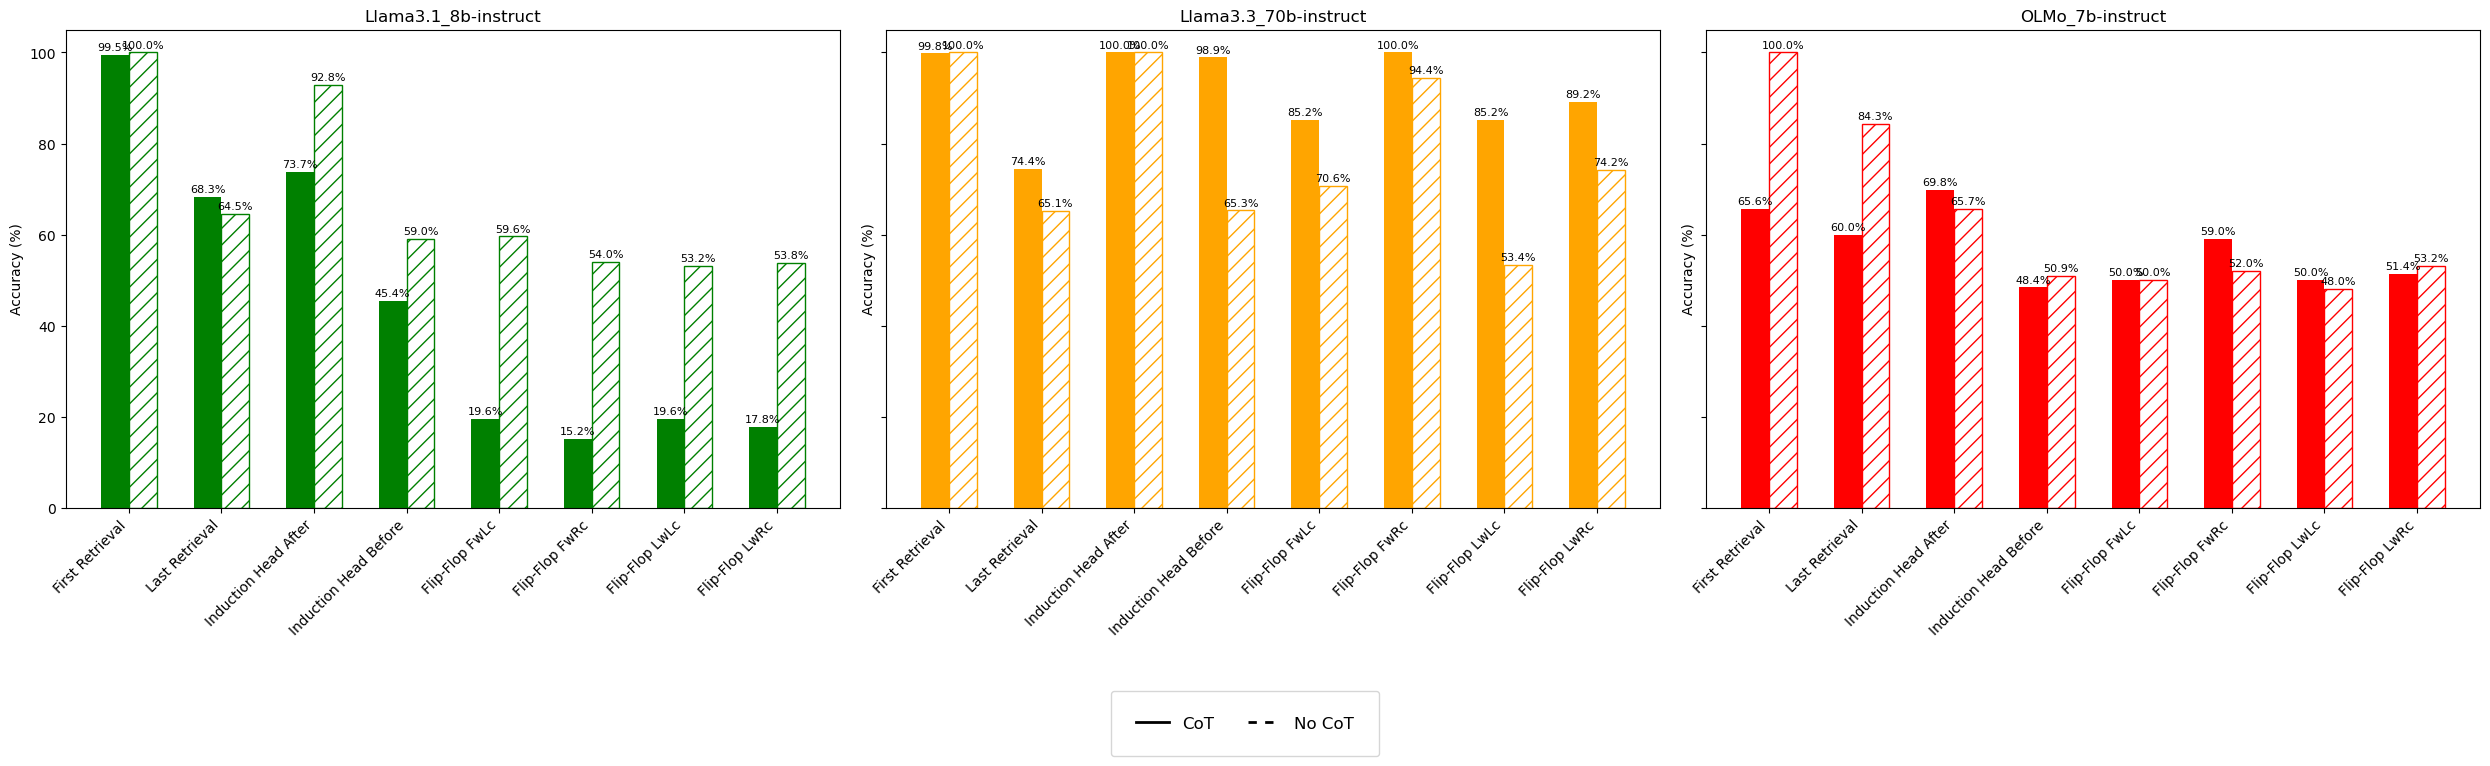

In [16]:
models = list(data.keys())
tasks = list(data[models[0]].keys())
variations = ['CoT', 'No CoT']
colors = {'Llama3.1_8b-instruct': 'green', 'Llama3.3_70b-instruct': 'orange', 'OLMo_7b-instruct': 'red'}

fig, axes = plt.subplots(1, 3, figsize=(25, 7), sharey=True)
bar_width = 0.3

for i, (model, ax) in enumerate(zip(models, axes)):
    x = np.arange(len(tasks))
    main_values = [data[model][task]['CoT'] for task in tasks]
    alt_values = [data[model][task]['No CoT'] for task in tasks]
    
    ax.bar(x - bar_width/2, main_values, bar_width, color=colors[model], label='CoT')
    ax.bar(x + bar_width/2, alt_values, bar_width, hatch='//', edgecolor=colors[model], facecolor='none', label='No CoT')
    
    ax.set_xticks(x)
    ax.set_xticklabels(tasks, rotation=45, ha='right')
    ax.set_title(model)
    ax.set_ylabel('Accuracy (%)')
    
    for j in range(len(tasks)):
        ax.text(x[j] - bar_width/2, main_values[j] + 1, f'{main_values[j]:.1f}%', ha='center', fontsize=8)
        ax.text(x[j] + bar_width/2, alt_values[j] + 1, f'{alt_values[j]:.1f}%', ha='center', fontsize=8)

legend_handles = [
    plt.Line2D([0], [0], color='black', lw=2, label='CoT'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle=(0, (3, 3)), label='No CoT')
]
fig.legend(handles=legend_handles, loc='lower center', ncol=2, fontsize=12, borderpad=1.5, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.savefig("model_wise_results.png",  dpi=300, bbox_inches='tight')
plt.show()

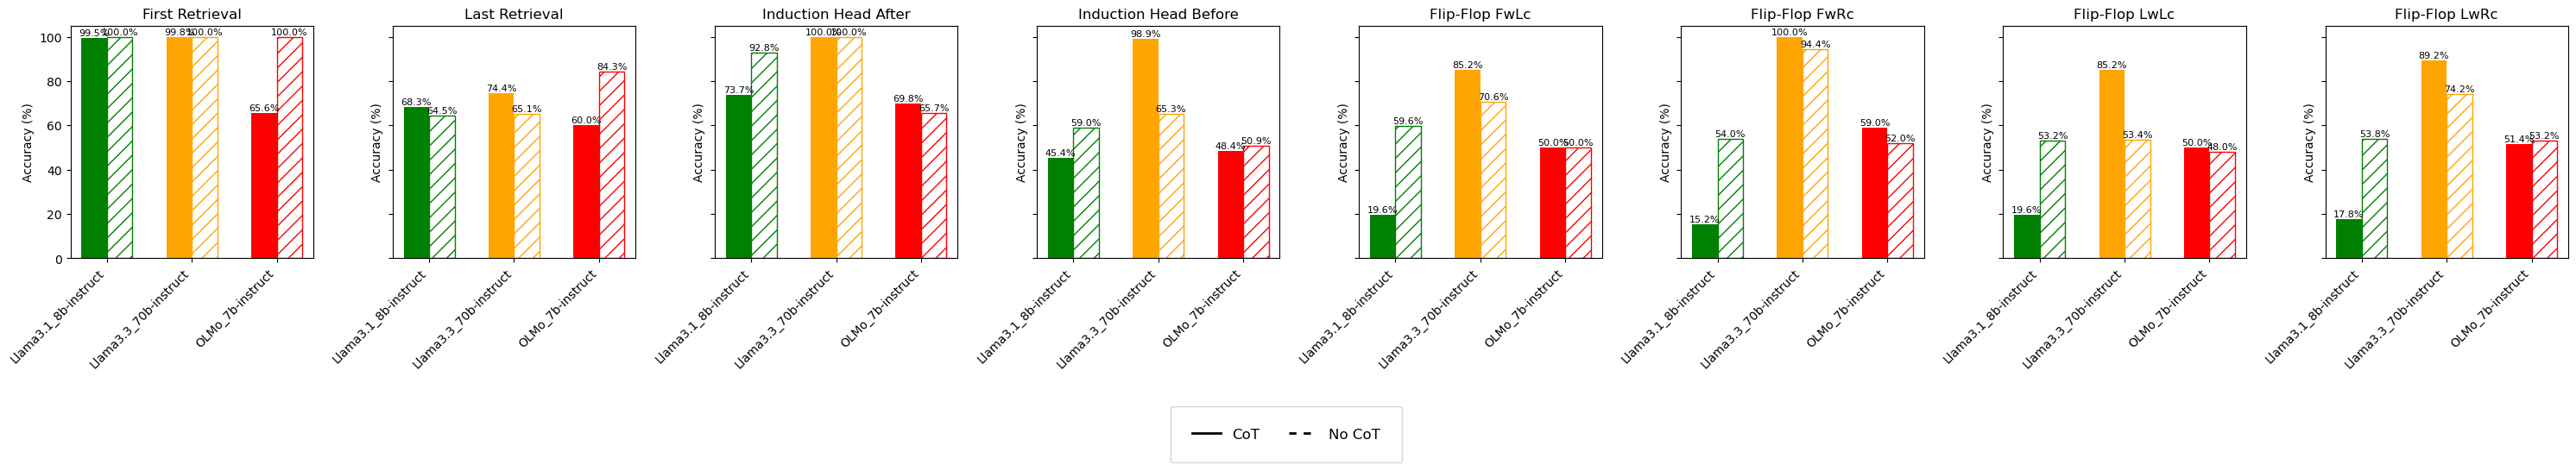

In [17]:
fig, axes = plt.subplots(1, len(tasks), figsize=(30, 5), sharey=True)
bar_width = 0.3

for i, (task, ax) in enumerate(zip(tasks, axes)):
    x = np.arange(len(models))
    
    main_values = [data[model][task]['CoT'] for model in models]
    alt_values = [data[model][task]['No CoT'] for model in models]
    
    ax.bar(x - bar_width/2, main_values, bar_width, color=[colors[model] for model in models], label='CoT')
    ax.bar(x + bar_width/2, alt_values, bar_width, hatch='//', edgecolor=[colors[model] for model in models], facecolor='none', label='No CoT')
    
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_title(task)
    ax.set_ylabel('Accuracy (%)')
    
    for j in range(len(models)):
        ax.text(x[j] - bar_width/2, main_values[j] + 1, f'{main_values[j]:.1f}%', ha='center', fontsize=8)
        ax.text(x[j] + bar_width/2, alt_values[j] + 1, f'{alt_values[j]:.1f}%', ha='center', fontsize=8)
    
legend_handles = [
    plt.Line2D([0], [0], color='black', lw=2, label='CoT'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle=(0, (3, 3)), label='No CoT')
]
fig.legend(handles=legend_handles, loc='lower center', ncol=2, fontsize=12, borderpad=1.5, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("task_results.png", dpi=300, bbox_inches='tight')
plt.show()


# Induction Head Before and After Completion vs. Instruct models

In [18]:
llama_8b_ind_after = get_data("flipflop_inductionhead/llama3.1_8B/inductionhead_zero-shot_completion_v0/500_after_seed-5.jsonl")
llama_8b_ind_before = get_data("flipflop_inductionhead/llama3.1_8B/inductionhead_zero-shot_completion_v0/500_before_seed-5.jsonl")

llama_70b_ind_after = get_data("flipflop_inductionhead/llama3.1_70B/inductionhead_zero-shot_completion_v0/500_after_seed-5.jsonl")
llama_70b_ind_before = get_data("flipflop_inductionhead/llama3.1_70B/inductionhead_zero-shot_completion_v0/500_before_seed-5.jsonl")

olmo_7b_ind_after = get_data("flipflop_inductionhead/OLMo_7B/inductionhead_zero-shot_completion_v0/500_after_seed-5.jsonl")
olmo_7b_ind_before = get_data("flipflop_inductionhead/OLMo_7B/inductionhead_zero-shot_completion_v0/500_before_seed-5.jsonl")

In [19]:
llama_8b_acc_ind_after = get_completion_accuracy(llama_8b_ind_after)
llama_8b_acc_ind_before = get_completion_accuracy(llama_8b_ind_before)

llama_70b_acc_ind_after = get_completion_accuracy(llama_70b_ind_after)
llama_70b_acc_ind_before = get_completion_accuracy(llama_70b_ind_before)

olmo_7b_acc_ind_after = get_completion_accuracy(olmo_7b_ind_after)
olmo_7b_acc_ind_before = get_completion_accuracy(olmo_7b_ind_before)

In [20]:
completion_data = {
    'Llama3.1_8b':
    {
        'Induction Before': llama_8b_acc_ind_before,
        'Induction After': llama_8b_acc_ind_after
    },
    'Llama3.1_8b-instruct':
    {
        'Induction Before': llama_8b_acc_ind_before_nocot,
        'Induction After': llama_8b_acc_ind_after_nocot
    },
    'Llama3.3_70b-instruct':
    {
        'Induction Before': llama_70b_acc_ind_before_cot,
        'Induction After': llama_70b_acc_ind_after_cot
    },
    'Llama3.1_70b':
    {
        'Induction Before': llama_70b_acc_ind_before,
        'Induction After': llama_70b_acc_ind_after
    },
    'OLMo_7b':
    {
        'Induction Before': olmo_7b_acc_ind_before,
        'Induction After': olmo_7b_acc_ind_after
    },
    'OLMo_7b-instruct':
    {
        'Induction Before': olmo_7b_acc_ind_before_nocot,
        'Induction After': olmo_7b_acc_ind_after_cot
    }
}
print(completion_data)

{'Llama3.1_8b': {'Induction Before': 52.400000000000006, 'Induction After': 57.3}, 'Llama3.1_8b-instruct': {'Induction Before': 59.0, 'Induction After': 92.80000000000001}, 'Llama3.3_70b-instruct': {'Induction Before': 98.9, 'Induction After': 100.0}, 'Llama3.1_70b': {'Induction Before': 51.2, 'Induction After': 99.4}, 'OLMo_7b': {'Induction Before': 0.0, 'Induction After': 0.0}, 'OLMo_7b-instruct': {'Induction Before': 50.9, 'Induction After': 69.8}}


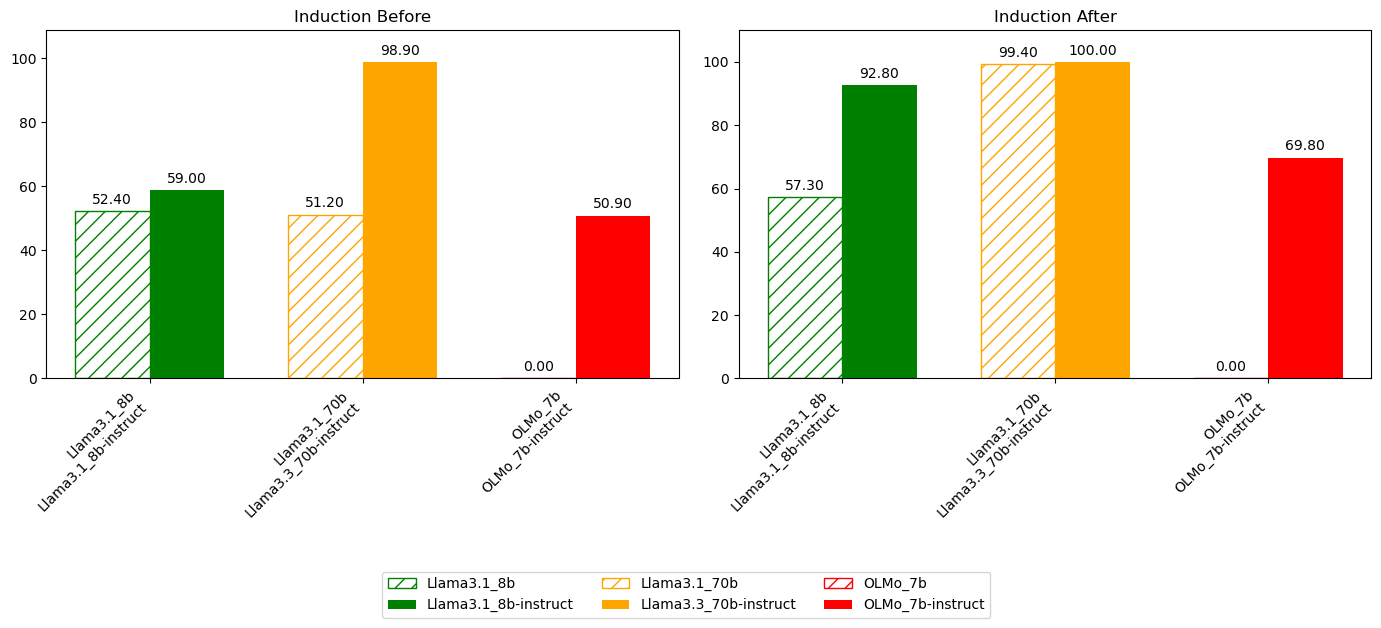

In [24]:
import matplotlib.patches as mpatches
instruct_colors = {
    '8b': 'green',   # for Llama3.1_8b-instruct
    '70b': 'orange', # for Llama3.3_70b-instruct
    '7b': 'red'      # for OLMo_7b-instruct
}

# Group models so that non-instruct and instruct versions appear next to each other.
groups = {
    '8b': ['Llama3.1_8b', 'Llama3.1_8b-instruct'],
    '70b': ['Llama3.1_70b', 'Llama3.3_70b-instruct'],
    '7b': ['OLMo_7b', 'OLMo_7b-instruct']
}

tasks = ['Induction Before', 'Induction After']
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
bar_width = 0.35
x = np.arange(len(groups))  # one tick per group

for ax, task in zip(axs, tasks):
    non_instruct_vals = []
    instruct_vals = []
    instruct_colors_list = []
    tick_labels = []
    
    for key, group in groups.items():
        non_instruct_vals.append(completion_data[group[0]][task])
        instruct_vals.append(completion_data[group[1]][task])
        instruct_colors_list.append(instruct_colors[key])
        tick_labels.append(f"{group[0]}\n{group[1]}")
    
    # Plot non-instruct bars: white fill with hatched pattern and colored edge.
    bars_non_instruct = ax.bar(x - bar_width/2, non_instruct_vals, width=bar_width, color='white')
    for rect, col in zip(bars_non_instruct, instruct_colors_list):
        rect.set_edgecolor(col)
        rect.set_hatch('//')
    
    # Plot instruct bars with solid fill.
    bars_instruct = ax.bar(x + bar_width/2, instruct_vals, width=bar_width, color=instruct_colors_list)
    
    # Annotate each bar with its rounded accuracy value (2 decimal points)
    for bar in bars_non_instruct + bars_instruct:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # vertical offset in points
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    ax.set_xticks(x)
    ax.set_xticklabels(tick_labels, rotation=45, ha='right')
    ax.set_title(task)
    ax.set_ylim(0, max(max(non_instruct_vals), max(instruct_vals)) * 1.1)

# Create legend handles for each model.
legend_handles = []
for key, models in groups.items():
    color = instruct_colors[key]
    patch_non = mpatches.Patch(facecolor='white', edgecolor=color, hatch='//', label=models[0])
    patch_instruct = mpatches.Patch(facecolor=color, label=models[1])
    legend_handles.extend([patch_non, patch_instruct])

# Add a common legend below the plots.
fig.legend(handles=legend_handles, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("induction_comp_vs_instruct.png", dpi=400, bbox_inches='tight')
plt.show()

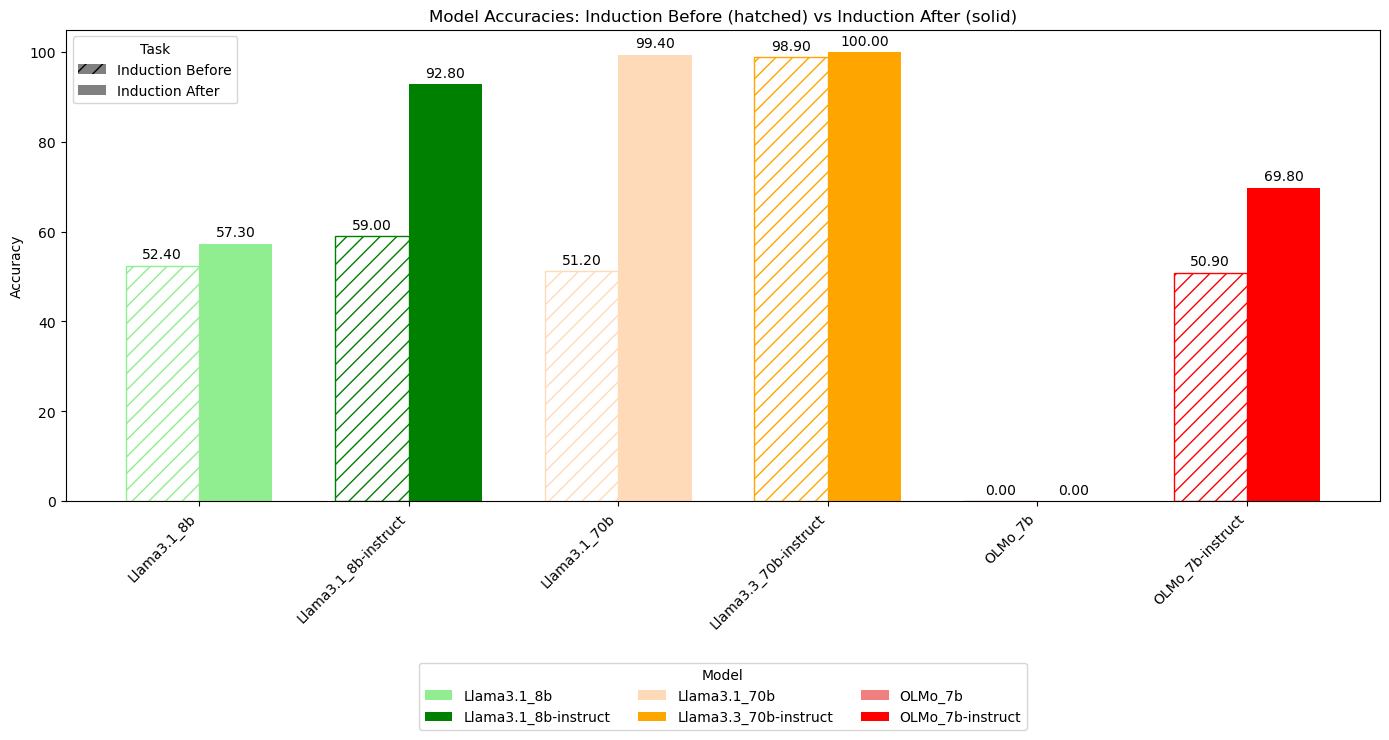

In [23]:
model_colors = {
    'Llama3.1_8b': 'lightgreen',              # non-instruct (lighter green)
    'Llama3.1_8b-instruct': 'green',            # instruct
    'Llama3.1_70b': 'peachpuff',                # non-instruct (lighter orange)
    'Llama3.3_70b-instruct': 'orange',          # instruct
    'OLMo_7b': 'lightcoral',                    # non-instruct (lighter red)
    'OLMo_7b-instruct': 'red'                   # instruct
}

# Order the models in the desired display order.
models = [
    'Llama3.1_8b',
    'Llama3.1_8b-instruct',
    'Llama3.1_70b',
    'Llama3.3_70b-instruct',
    'OLMo_7b',
    'OLMo_7b-instruct'
]

N = len(models)
x = np.arange(N)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(14, 10))

# Extract the accuracies for each model.
induction_before_vals = [completion_data[m]['Induction Before'] for m in models]
induction_after_vals  = [completion_data[m]['Induction After'] for m in models]
colors = [model_colors[m] for m in models]

# Plot bars: for each model, plot two bars side-by-side.
# Induction Before: hatched bars.
bars_before = ax.bar(x - bar_width/2, induction_before_vals, width=bar_width, hatch='//', color="white")
# Set the edge color of the hatched bars to match the model colors.
for i, bar in enumerate(bars_before):
    bar.set_edgecolor(colors[i])

# Induction After: solid bars.
bars_after = ax.bar(x + bar_width/2, induction_after_vals, width=bar_width, 
                    color=colors)

# Annotate each bar with its rounded (2 decimals) accuracy value.
for bar in bars_before + bars_after:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Set the x-axis ticks and labels.
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies: Induction Before (hatched) vs Induction After (solid)')

# Create legend handles.
# Legend for tasks (pattern vs solid).
task_handles = [
    mpatches.Patch(facecolor='gray', hatch='//', label='Induction Before'),
    mpatches.Patch(facecolor='gray', label='Induction After')
]
legend_task = ax.legend(handles=task_handles, loc='upper left', title='Task')

# Legend for models.
model_handles = [mpatches.Patch(facecolor=model_colors[m], label=m) for m in models]
legend_models = ax.legend(handles=model_handles, loc='lower center', ncol=3, 
                          bbox_to_anchor=(0.5, -0.5), title='Model')
ax.add_artist(legend_task)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("induction_comp_vs_instruct_together.png", dpi=400, bbox_inches='tight')
plt.show()